In [1]:
import sys
import pickle
import cv2
import math
sys.path.append('..')    
sys.path.append('../letter_recognition')    
from letter_extraction import CompositeExtractor, ContoursExtractor, EdgeParams
from letter_extraction import ThresholdDetector, EdgeDetector, ExtractFragmentParams
from metrics import KeyboardLayout
from models import BaseDenseNet
from models import ConvDenseNet
from metrics import KeyboardLayout
from core import ImageGenerator
from utils.plot import *
from utils.model import *
from layout_estimation import TripleLayoutEstimator, LayoutUtils
from PIL import Image, ImageDraw

%matplotlib inline

In [2]:
def test_model(model, fragment_list):
    image_list = map(lambda x: x[1], fragment_list)
    image_data = np.array(image_list, dtype=np.float64).reshape(-1, 1, 32, 32)
    output_data = np.zeros((len(fragment_list), 37))
    for i in range(int(math.ceil(len(fragment_list) / float(300)))):
        print(i)
        from_ind, to_ind = 300 * i, 300 * (i + 1)
        output_data[from_ind:to_ind, :] = get_output_data(model, image_data[from_ind:to_ind, :, :, :])
    pred_list = map(lambda i: {
        'image': image_list[i], 
        'output': output_data[i], 
        'coord': fragment_list[i][0],
        'letter':  encode_class(np.argsort(output_data[i])[-1])
    }, range(len(fragment_list)))
    letter_preds_map = get_all_above_threshold(pred_list, 0.7)
    for letter, preds in letter_preds_map.iteritems():
        letter_preds_map[letter] = sorted(preds, key=lambda x: np.max(x['output']))[-3:]
    image_data = [pred for sublist in letter_preds_map.values() for pred in sublist]
    for image in image_data:
        plot_image(image['image'])
        print(image['letter'], np.exp(np.max(image['output'])))
    return letter_preds_map

model = load_base_dense_net('../letter_recognition/state_dicts/train/rotate7.pt', 40)
model.eval()

BaseDenseNet(
  (conv1): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (dense1): Sequential(
    (0): Bottleneck(
      (bn1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(24, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(48, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): Bottleneck(
      (bn1): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(36, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(48, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (2): Bottleneck(
      (bn1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

592
0
1


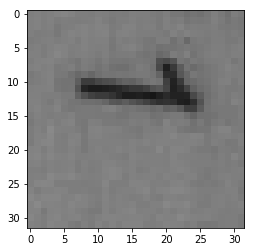

('1', 0.72240829461370726)


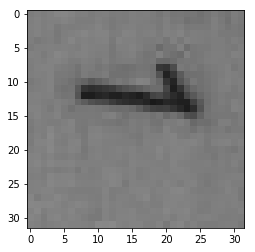

('1', 0.76675584492718929)


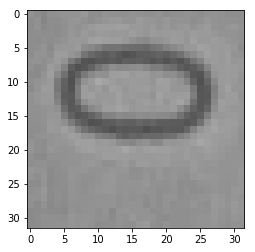

('0', 0.99179978267606594)


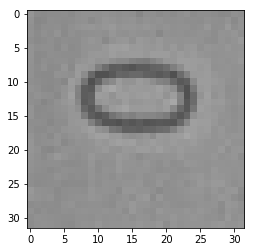

('0', 0.99433412040649727)


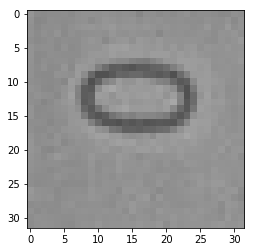

('0', 0.99433412040649727)


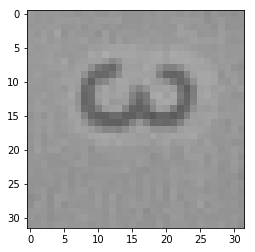

('3', 0.99844767065012929)


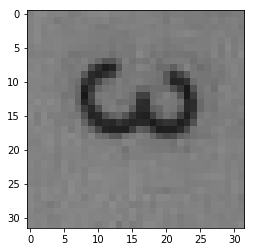

('3', 0.99941652160811978)


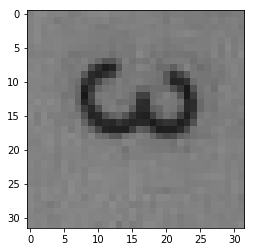

('3', 0.99941652160811978)


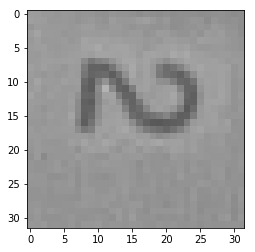

('2', 0.99908775003243233)


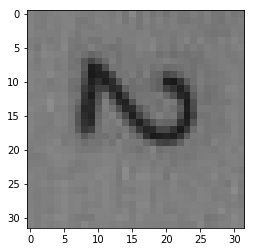

('2', 0.99947942936717626)


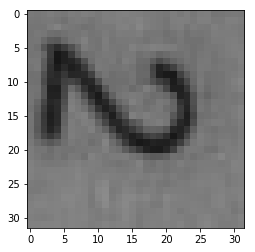

('2', 0.99996948288753151)


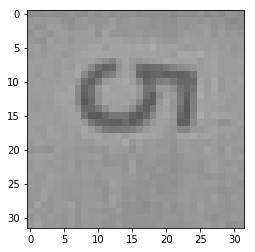

('5', 0.99441662339846537)


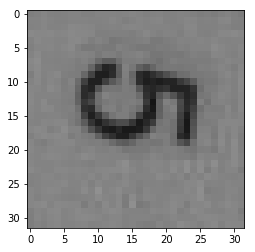

('5', 0.9996862903670628)


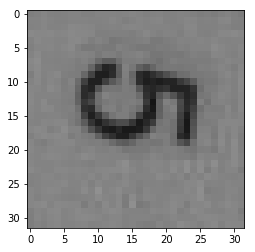

('5', 0.9996862903670628)


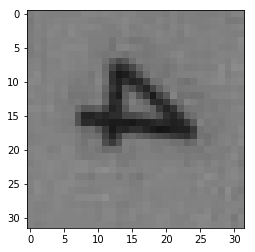

('4', 0.99823630597977819)


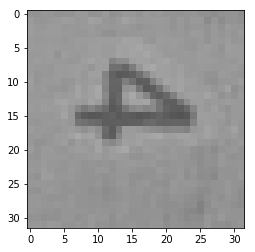

('4', 0.99911061759797881)


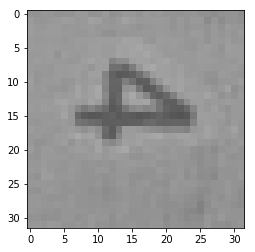

('4', 0.99911061759797881)


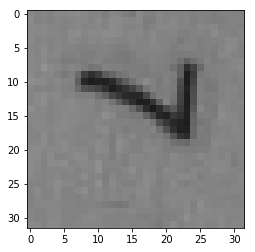

('7', 0.96267335994800129)


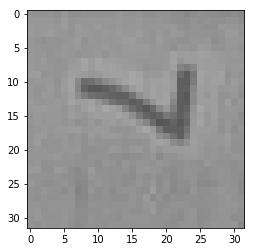

('7', 0.96452598325766847)


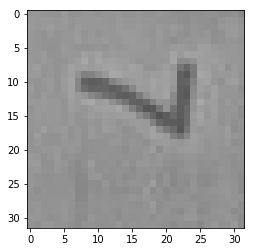

('7', 0.97685365677724167)


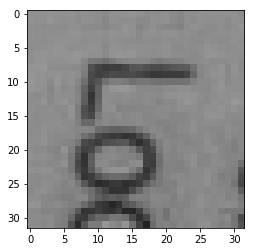

('6', 0.72700847888813558)


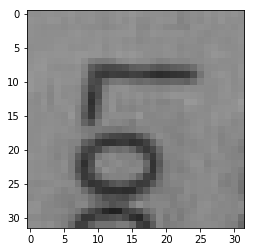

('6', 0.78829070973005611)


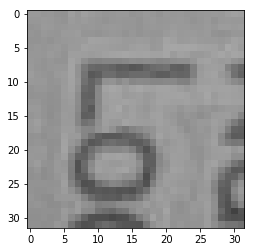

('6', 0.98278820392036426)


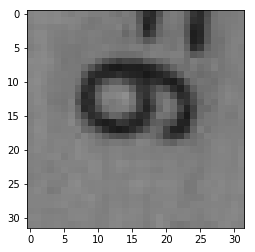

('9', 0.89374461954806195)


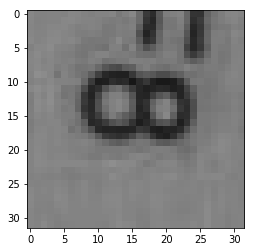

('8', 0.95547696410257643)


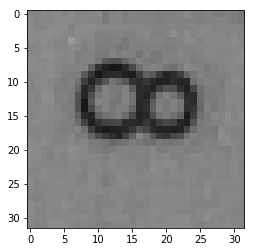

('8', 0.99466796779975908)


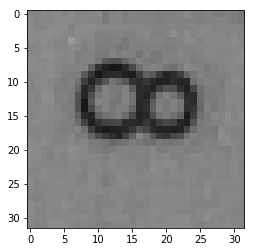

('8', 0.99466796779975908)


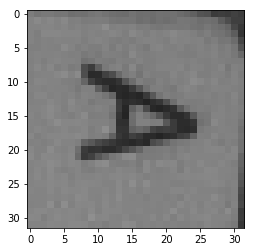

('A', 0.99780895292785088)


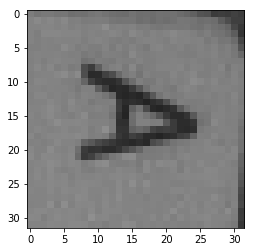

('A', 0.99780895292785088)


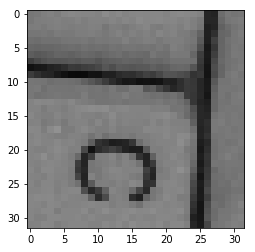

('C', 0.8507038708537743)


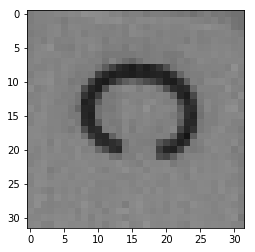

('C', 0.99960906996334087)


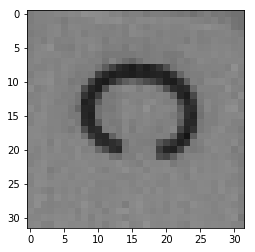

('C', 0.99960906996334087)


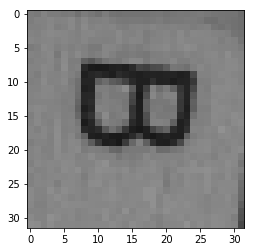

('B', 0.99946036599174803)


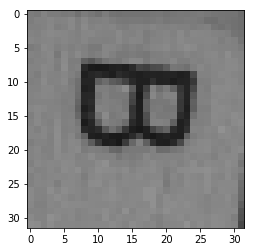

('B', 0.99946036599174803)


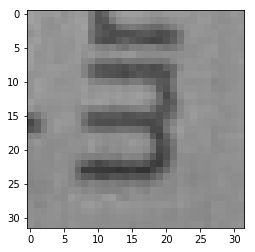

('E', 0.90375734190982027)


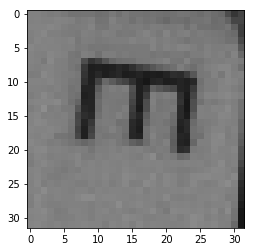

('E', 0.99614126843346429)


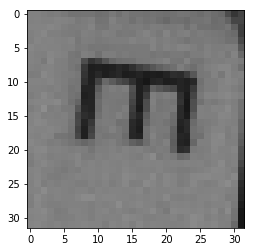

('E', 0.99614126843346429)


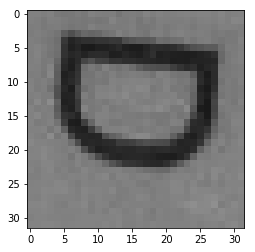

('D', 0.99726669700531445)


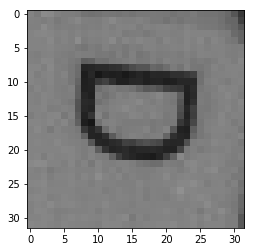

('D', 0.99974730823809499)


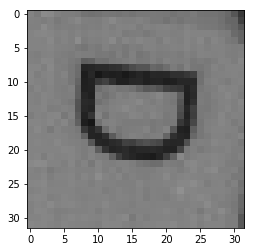

('D', 0.99974730823809499)


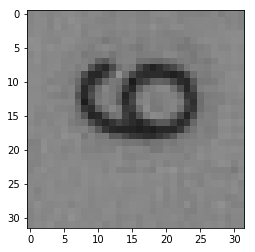

('G', 0.9660053052970301)


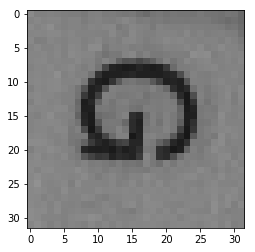

('G', 0.99977591164719104)


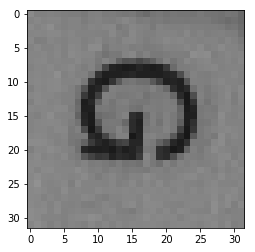

('G', 0.99977591164719104)


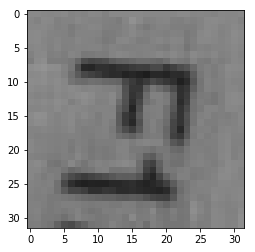

('F', 0.97617149789337465)


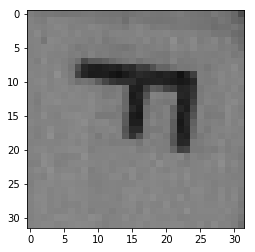

('F', 0.99803260040932629)


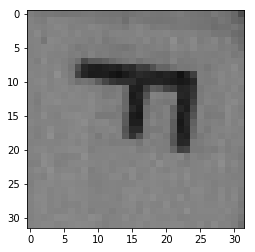

('F', 0.99803260040932629)


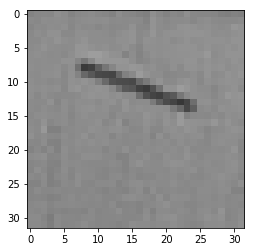

('I', 0.74016873813648221)


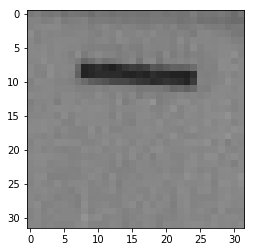

('I', 0.75567079058052911)


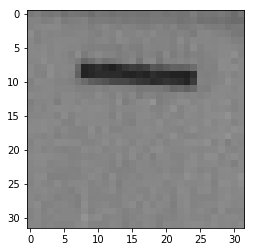

('I', 0.75567079058052911)


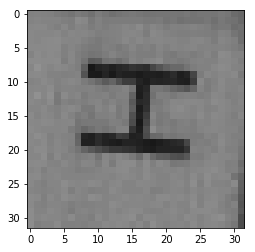

('H', 0.99931835528915247)


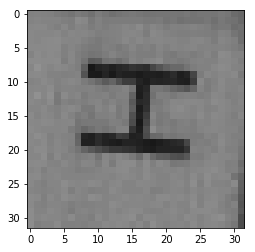

('H', 0.99931835528915247)


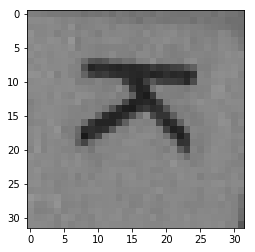

('K', 0.99990749786989452)


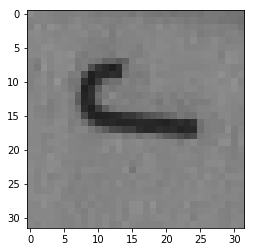

('J', 0.99948991437864942)


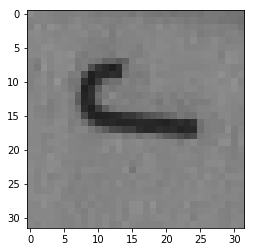

('J', 0.99948991437864942)


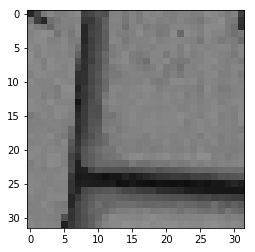

('L', 0.82487455702551815)


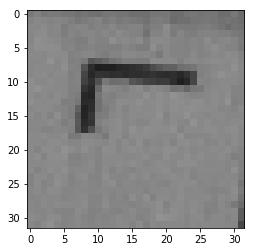

('L', 0.9885136668014175)


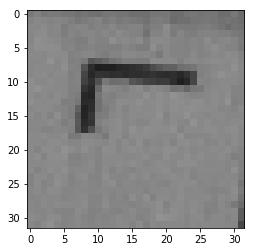

('L', 0.9885136668014175)


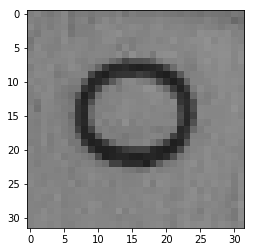

('O', 0.9984809979928283)


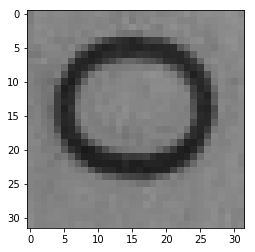

('O', 0.99897056197353384)


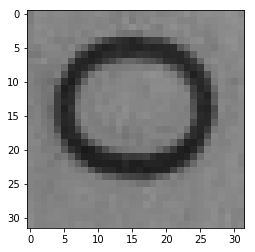

('O', 0.99897056197353384)


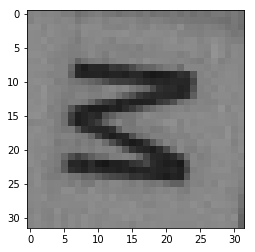

('N', 0.99432937906323882)


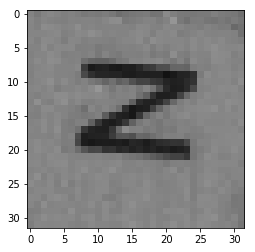

('N', 0.9997701908999036)


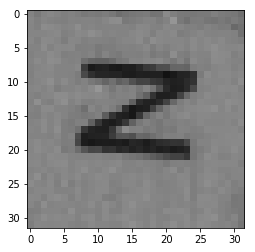

('N', 0.9997701908999036)


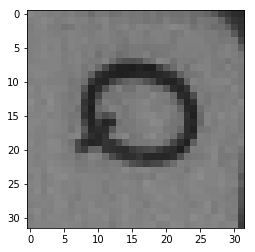

('Q', 0.98984757219694186)


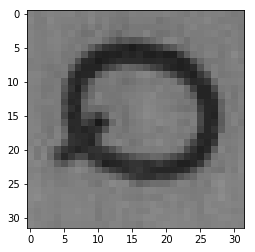

('Q', 0.99910299501797473)


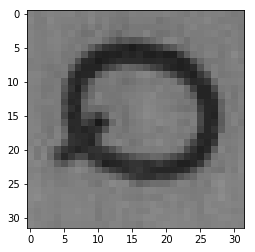

('Q', 0.99910299501797473)


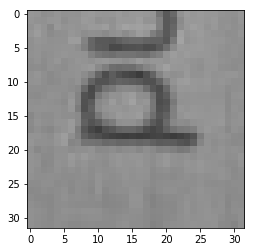

('P', 0.82411852849700085)


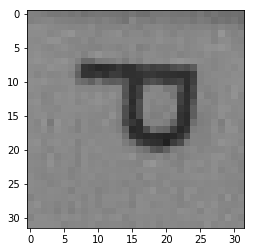

('P', 0.99797359067430891)


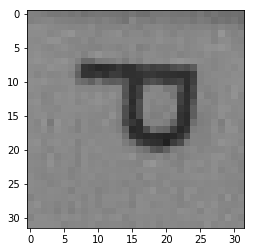

('P', 0.99797359067430891)


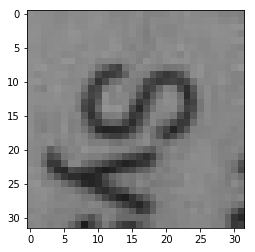

('S', 0.92354348649653706)


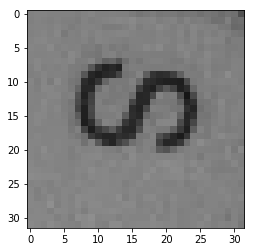

('S', 0.9995909573990065)


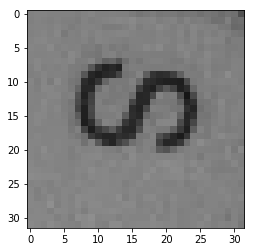

('S', 0.9995909573990065)


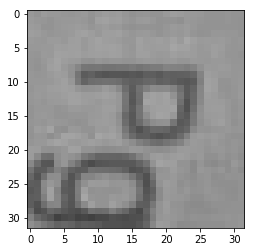

('R', 0.80477683334546479)


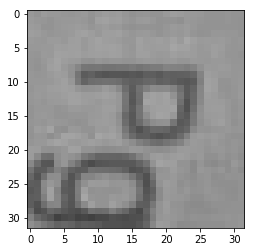

('R', 0.80477683334546479)


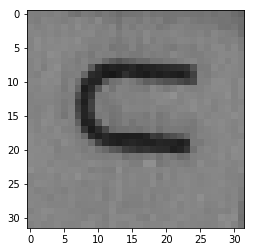

('U', 0.99780038870166476)


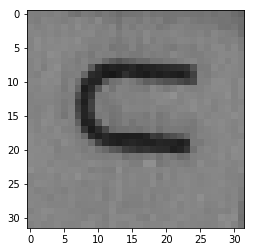

('U', 0.99780038870166476)


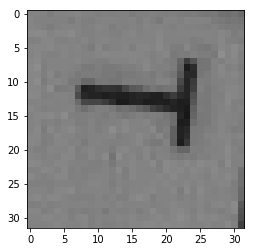

('T', 0.95797969572376973)


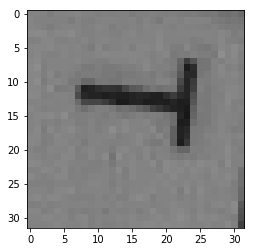

('T', 0.95797969572376973)


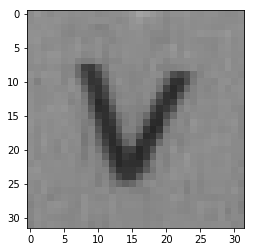

('V', 0.963505956460594)


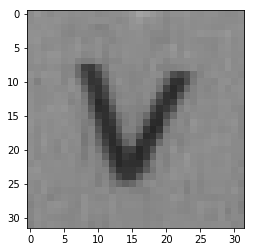

('V', 0.963505956460594)


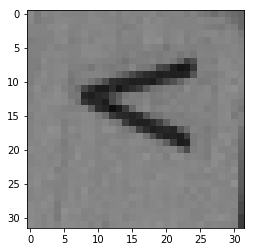

('V', 0.99481785620059859)


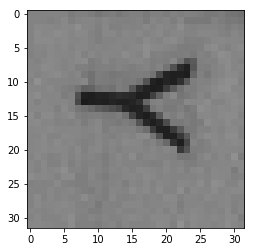

('Y', 0.99993133780657506)


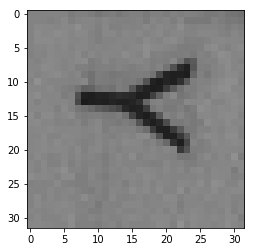

('Y', 0.99993133780657506)


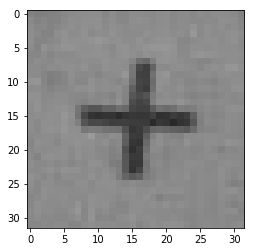

('X', 0.98305254674737297)


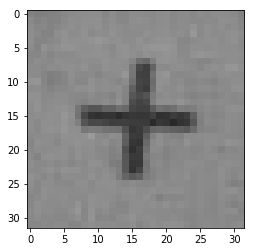

('X', 0.98305254674737297)


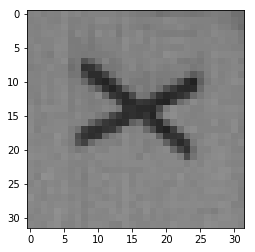

('X', 0.99925259877947603)


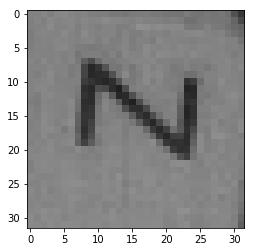

('Z', 0.99322526218526863)


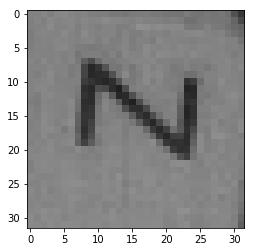

('Z', 0.99322526218526863)


In [3]:
extract_params = ExtractFragmentParams(min_scale=100, max_scale=30, extract_scale=1.8)
thres_detector = ContoursExtractor(ThresholdDetector())
edge_params = EdgeParams(min_edge_thres=50, max_edge_thres=230, retr_type=1L, retr_approx=2L, min_poly=3, max_area_scale=1)
edge_detector = ContoursExtractor(EdgeDetector(edge_params), extract_params)
contours_extractor = CompositeExtractor([thres_detector, edge_detector])
keyboard_layout = KeyboardLayout("../keyboards/layouts/keyboard{}.layout".format(25), '../')
fragment_list = edge_detector.get_fragment_list(keyboard_layout.get_image())
print(len(fragment_list))
letter_preds_map = test_model(model, fragment_list[:])

In [4]:
def get_middle_point(coord):
    ps, pe = coord['start_pos'], coord['end_pos']
    return ((ps[0] + pe[0]) / 2, (ps[1] + pe[1]) / 2)

def test_pair(elem1, elem2):
    middle1 = get_middle_point(elem1['coord'])
    print(middle1)
    middle2 = get_middle_point(elem2['coord'])
    middle2 = (middle2[0] + (middle2[0] - middle1[0]) * 10, middle2[1] + (middle2[1] - middle1[1]) * 10)
    image_draw = ImageDraw.Draw(pil_image)
    image_draw.line(middle1 + middle2, fill=255, width=20)
    del image_draw
    plt.figure(figsize=(14, 9))        
    plt.imshow(pil_image)
    plt.show()       

pil_image = Image.fromarray(keyboard_layout.get_image())        
#test_pair(letter_preds_map['Q'][0], letter_preds_map['8'][1])    

In [5]:
pred_list = [pred for sublist in letter_preds_map.values() for pred in sublist]
for pred in pred_list:
    pred['middle'] = np.array(get_middle_point(pred['coord']))

In [6]:
row_preds_map = {}
for pred in pred_list:
    row_ind = LayoutUtils.get_letter_row_index(pred['letter'])
    pos_ind = LayoutUtils.get_letter_pos(pred['letter'])
    if row_ind not in row_preds_map:
        row_preds_map[row_ind] = {}
    if pos_ind not in row_preds_map[row_ind]:
        row_preds_map[row_ind][pos_ind] = []
    row_preds_map[row_ind][pos_ind].append(pred)

In [7]:
triples_list = []

def add_triples_for_row(row_ind, pos1, pos2, row_offset):
    neigh_row = row_ind + row_offset
    if neigh_row not in row_preds_map:
        return
    for row_pred1 in row_preds_map[row_ind][pos1]:
        for row_pred2 in row_preds_map[row_ind][pos2]:
            neigh_preds = row_preds_map[neigh_row].values()
            for col_pred in [x for sublist in neigh_preds for x in sublist]:
                col_pos = LayoutUtils.get_letter_pos(col_pred['letter'])
                if col_pos > len(LayoutUtils.get_letter_rows()[row_ind]) - 1:
                    continue
                triples_list.append((row_pred1, row_pred2, col_pred))
    
for row_ind in row_preds_map.keys():
    for pos1 in row_preds_map[row_ind].keys():
        for pos2 in row_preds_map[row_ind].keys():
            if pos1 + 3 > pos2:
                continue
            add_triples_for_row(row_ind, pos1, pos2, -1)
            add_triples_for_row(row_ind, pos1, pos2, 1)

In [8]:
def get_height_diff(layout, letter1, letter2):
    l1, l2 = layout[letter1], layout[letter2]
    return ((l1[0] - l2[0]) ** 2 + (l1[1] - l2[1]) ** 2)

def get_col_rating(layout):
    diff_list = [('1', 'Q'), ('Q', 'A'), ('A', 'Z')]
    heights = map(lambda x: get_height_diff(layout, x[0], x[1]), diff_list)
    if max(heights) == 0:
        return -1
    return float(min(heights)) / max(heights)
    
def rate_layout(layout):
    letter_pred_map = {}
    for pred in pred_list:
        letter_coord = tuple(layout[pred['letter']])
        start_pos, end_pos = pred['coord']['start_pos'], pred['coord']['end_pos']
        if letter_coord not in letter_pred_map:
            letter_pred_map[letter_coord] = 0
        if KeyboardLayout._is_point_in_middle(letter_coord, start_pos, end_pos):
            letter_pred_map[letter_coord] = max(letter_pred_map[letter_coord], pred['pbp'])
    return sum(letter_pred_map.values())

In [9]:
best_layout = None
max_rating = 0.0
for triple in triples_list:
    row_pred1, row_pred2, col_pred = triple[0], triple[1], triple[2]
    layout_estimator = TripleLayoutEstimator(pred_list, row_pred1, row_pred2, col_pred)
    estimated_layout = layout_estimator.get_estimated_layout()
    cur_rating = rate_layout(estimated_layout) * get_col_rating(estimated_layout)
    if cur_rating > max_rating:
        best_layout = estimated_layout
        max_rating = cur_rating
print(max_rating)
print(get_col_rating(best_layout))

17.5427633677
0.816150641287


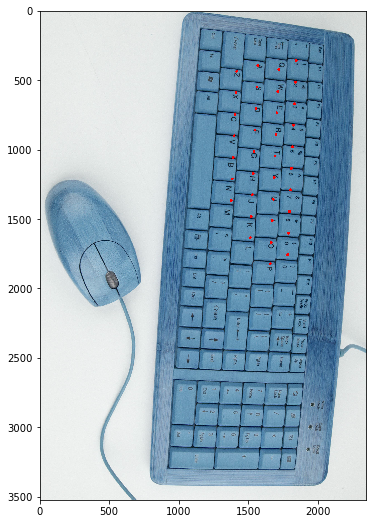

In [10]:
pil_image = Image.fromarray(keyboard_layout.get_image())        
image_draw = ImageDraw.Draw(pil_image)
for letter, coord in best_layout.iteritems():
    image_draw.ellipse((coord[0] - 10, coord[1] - 40, coord[0] + 10, coord[1] - 20), fill=(255,0,0,255))
plt.figure(figsize=(14, 9))        
plt.imshow(pil_image)
plt.show()           